<a href="https://www.dask.org/" target="_blank">
<img src="http://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg"
     align="right"
     width="30%"
     alt="Dask logo\">
</a>

# Scalability

In this notebook, we will explain how Dask achieves scalability from multi-core local machines to large distributed clusters.

**Introduction**

Dask employs the **client-server model** to map computations to multiple cores in a single machine or distributed clusters. 

* In the client side, a Python/Notebook application can send tasks (computations) to a **Dask Cluster**.
* A Dask Cluster is composed of a **scheduler** and the **workers**.
* The scheduler receives tasks (computations) and decides which worker will perform every task.
* The workers perform computations and store/share results with other workers.

<center>
<img src="img/dask-cluster.png" width="80%"/>
</center>
<center>
<a href="https://tutorial.dask.org/00_overview.html" target="_blank" width="30%"> Reference: Dask Tutorial Documentation </a>
</center>

**Content**

1. Cluster in a Local Machine.
2. Cluster in a High Performance Computing System.

## 1. Cluster in a Local Machine

The local cluster is the best option for researchers who are **getting started with Dask**. This configuration allows the execution of preliminary tests to later deploy the solution in large Supercomputers or the Cloud. 

You can define a local cluster in two ways [2].

* Implicitly, Dask creates a default local cluster for you. This cluster will use all the available cores on your computer.
* Explicitly, You define the local cluster by yourself using the Dask library.

### 1.1. Implicit cluster definition

In the implicit mode, the user doesn't have to define the cluster. Once the user defines a computation and uses the method `compute`, a default cluster is created for her. The default configuration uses all computer's available cores. More information can be found in [2]. Let's take a look on this.

__1. Import required libraries, define required variables and functions__

In [1]:
import dask.array as da

__2. Define some computation__

In [4]:
x = da.ones((1000,1000), chunks=(100,100))
z = x.sum() # This uses Dask default local cluster
z

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

__3. Visualize the computations.__

_Hint: This computations will be performed in all the cores available in your computer._

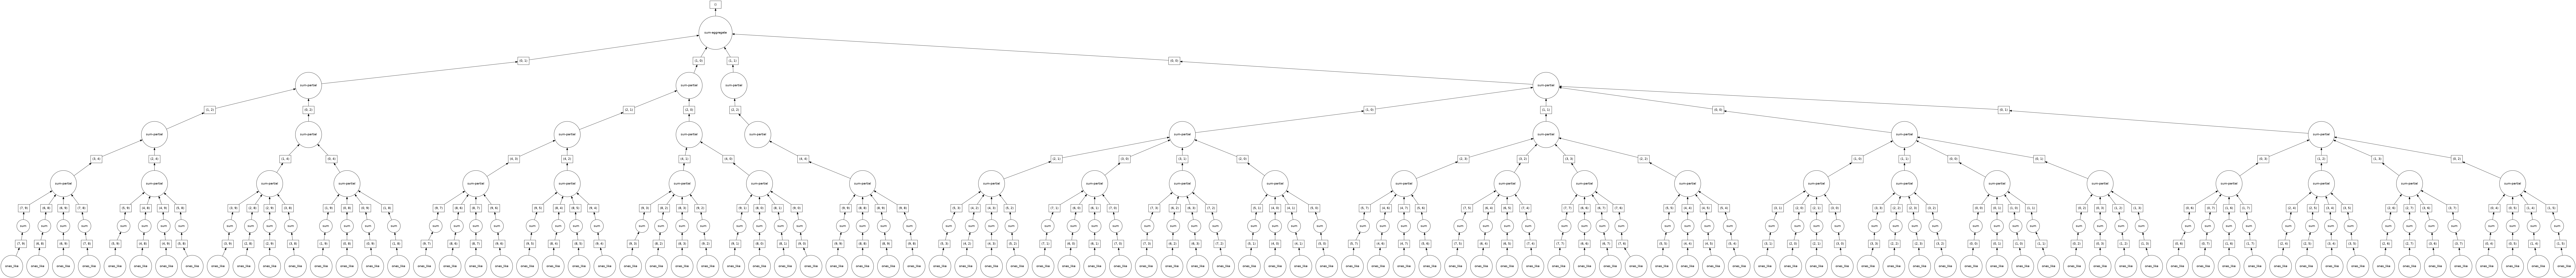

In [3]:
z.visualize()

__4. Compute the result__

_Hint: Dask submit all the computations to the scheduler, then, the scheduler will be in charge of distributing the computations among the available computing cores._ 

In [5]:
z.compute() # This uses Dask default local cluster

1000000.0

### 1.2. Explicit cluster definition

Advanced users prefer to define the cluster by themselves, i.e., explicitly, this gives them more flexibility for the configuration of the cluster. For example, they can define how many **workers** they want to use and how many `cores` and `memory` they want each worker to have. Finally, when you define the cluster by yourself, you will be able to access the **Dask Dashboard**.

In the explicit mode, you can define a cluster in one of two ways:
* By defining the client
* By defining the cluster and the client

#### 1.2.1. By defining the client

__1. Import required libraries, define required variables and functions__

In [10]:
from dask.distributed import Client
import dask.array as da

__2. Create a cluster by defining the client__

_Hint: The creation of the client, implies the creation of a cluster._

_Note: **Be careful** you should not execute the cell below multiple times, as that will create several clusters._

_Activities:_ 

1. Change `#...` to your user name, for example: `"carla1"`
2. Run the cell below
3. Use the option `Launch dashboard in JupyterLab`, this will display the **Dask Dashboard**

In [11]:
client = Client(
    name=#...,
    n_workers=2,
    processes=True,
    memory_limit="4GB",
    threads_per_worker=1,
    dashboard_address=":0"
)

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.5.86.235:43609/status,
Dashboard: http://192.5.86.235:43609/status,Workers: 2
Total threads: 2,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40067,Workers: 2
Dashboard: http://192.5.86.235:43609/status,Total threads: 2
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:40155,Total threads: 1
Dashboard: http://192.5.86.235:39535/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:44957,


__3. Perform some computation__

_Hint: Use the Dashboard to see what is happenning while your computation is taking place._

In [13]:
x = da.ones((10000,10000), chunks=(1000,1000))
z = x.sum()
z.compute()

100000000.0

__4. Showdown the cluster__

_Hint: This is **MANDATORY**. Once you finish using a cluster you must turn it off since it will release the computing resources it was using_

In [14]:
# Shut down the cluster 
client.shutdown()

__5. Close the connection between the client and the cluster__

In [15]:
client.close()

#### 1.2.2. By defining the cluster and the client

__1. Import required libraries, define required variables and functions__

In [17]:
from dask.distributed import Client, LocalCluster 
import dask.array as da

__2. Create a Dask cluster__

In [18]:
cluster = LocalCluster(
    name=#...,
    n_workers=2,
    processes=True,
    memory_limit="4GB",
    threads_per_worker=1,
    dashboard_address=":0"
)

cluster

aurelio(aurelio, 'tcp://127.0.0.1:40323', workers=2, threads=2, memory=7.45 GiB)

__3. Create a Dask Client and connect the client to the Dask cluster__

In [19]:
client = Client(cluster)  # Connect to distributed cluster and override default
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.5.86.235:35435/status,
Dashboard: http://192.5.86.235:35435/status,Workers: 2
Total threads: 2,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40323,Workers: 2
Dashboard: http://192.5.86.235:35435/status,Total threads: 2
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:42853,Total threads: 1
Dashboard: http://192.5.86.235:40773/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:38485,


__3. Perform some computation__

_Hint: Use the Dashboard to see what is happenning while your computation is taking place._

In [20]:
x = da.ones((10000,10000), chunks=(1000,1000))
z = x.sum() # This uses Dask default local cluster
z.compute()

100000000.0

__3. Showdown the cluster__

In [21]:
cluster.close()

__4. Close the connection between the client and the cluster__

In [22]:
client.close()

## 2. Cluster in a High Performance Computing System

* High Performance Computing (HPC) systems are **tightly coupled, custom, specialized computers**. The primary objective is to **accelerate numerical analysis at a large scale**. However, in the last years, supercomputers have been adapted to comply with both numerical and data analysis. 
* Dask can be deployed in an HPC system to perform large-scale data analysis. Depending on how Dask was configured in the HPC, it will bring significant advantages in communication-intensive computations.

| Diagram                                                                                                                             | High Performance Computing System (El Capitan)                                                                                                                             |
|-----------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
|                                                         |
| <img src="img/hpc_diagram.png" width="600px"> | <img src="img/hpc_el_capitan.jpeg" width="600px"> |
<center>

</center>

__1. Import required libraries, define required variables and functions__

In [23]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import dask.array as da

__2. Create a Dask cluster__

_Hint: Here you will define how namy `cores` and `memory` will have every Dask worker._

In [25]:
cluster = SLURMCluster(
    name="aurelio",
    cores=1,
    memory="8GB",
    processes=True,
    scheduler_options={"dashboard_address": ":0"}
)

cluster

Dashboard: http://192.5.86.235:35875/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://192.168.0.50:42729,Workers: 0
Dashboard: http://192.5.86.235:35875/status,Total threads: 0
Started: Just now,Total memory: 0 B


__3. Create a Dask Client and connect the client to the Dask cluster in the High Performance Computing System__

_Activities:_ 

1. Run the cell below
2. Use the option `Launch dashboard in JupyterLab`, this will display the Dask Dashboard.

In [26]:
client = Client(cluster)  # Connect to distributed cluster and override default
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://192.5.86.235:35875/status,
Dashboard: http://192.5.86.235:35875/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://192.168.0.50:42729,Workers: 0
Dashboard: http://192.5.86.235:35875/status,Total threads: 0
Started: Just now,Total memory: 0 B


__4. Deploy workers for your Dask cluster__

_Hint: each worker will be a slurm job._

In [27]:
cluster.scale(jobs=2)

__5. Adjust the number of workers according to the workload__

_Hint: This also works with adaptive clusters. This automatically launches and kill workers based on load [7]._

In [ ]:
# DANGEROUS ZONE, PLEASE DO NOT USE IT, THIS WILL BE EXECUTED BY THE INSTRUCTOR
# cluster.adapt(minimum=1, maximum=4)

__6. Perform some computation__

_Hint: Use the Dashboard to see what is happenning while your computation is taking place._

In [28]:
x = da.ones((1000,1000), chunks=(100,100))
z = x.sum() # This uses Dask default local cluster
z.compute()

1000000.0

__7. Showdown the cluster__

In [29]:
cluster.close()

__9. Close the connection between the client and the cluster__

In [30]:
client.close()

# [Excerise 3](labs/Lab3.ipynb)

# References

1. Deploy Dask Clusters - https://docs.dask.org/en/stable/deploying.html
2. Single-Machine Scheduler - https://www.devdoc.net/python/dask-2.23.0-doc/setup/single-machine.html
3. Getting Started with Dask: A Dask Setup Guide - https://www.youtube.com/watch?v=TQM9zIBzNBo&t=82s
4. Scheduler Overview - https://docs.dask.org/en/stable/scheduler-overview.html
5. JupyterLab Extension: How to Integrate Dask Dashboards & JupyterLab in 5 Minutes - https://www.youtube.com/watch?v=EX_voquHdk0&t=293s
6. Dask on HPC Introduction - https://www.youtube.com/watch?v=FXsgmwpRExM&t=9s
7. dask_jobqueue.SLURMCluster - https://jobqueue.dask.org/en/latest/generated/dask_jobqueue.SLURMCluster.html
8. Configure Dask-Jobqueue - https://jobqueue.dask.org/en/latest/configuration-setup.html
9. Dask Dashboard walkthrough - https://www.youtube.com/watch?v=N_GqzcuGLCY
10. Dashboard Diagnostics - https://docs.dask.org/en/stable/dashboard.html#dashboard-diagnostics